## Analysis of results on DataCenterEnv

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

/home/ec2-user/sustaingym


In [2]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [31]:
def read_results_csv(folder):
    csv_path = os.path.join('logs', 'cogen', 'rllib', folder, 'test_results.csv')
    df = pd.read_csv(csv_path)
    # change index to seed column
    # print(df.head())
    df.set_index('seed', inplace=True)
    # change 'return' column to 'reward'
    df.rename(columns={'return': 'reward'}, inplace=True)
    return df

In [8]:
csv_path = os.path.join('logs', 'cogen', 'rllib', 'ppo_lr5e-05_seed123', 'test_results.csv')
df = pd.read_csv(csv_path)

Figure out the best seed + learning rate for each of the pre-distribution shift environments

In [21]:
from pprint import pprint

In [23]:
returns = []

for seed in ['123', '456', '789']:
    for lr in ['0.0005', '5e-05', '5e-06']:
        df = read_results_csv('ppo_lr{}_seed{}'.format(lr, seed))
        returns.append(('lr = {}, seed = {}'.format(lr, seed), df['return'].mean()))
        # print('lr = {}, seed = {}'.format(lr, seed), df['return'].mean())
pprint(sorted(returns, key=lambda x: x[1], reverse=True))

[('lr = 5e-06, seed = 456', -4456169.154200068),
 ('lr = 5e-06, seed = 123', -5323533.844060297),
 ('lr = 5e-06, seed = 789', -6586136.849602086),
 ('lr = 5e-05, seed = 456', -10063553.544538701),
 ('lr = 0.0005, seed = 789', -10564073.243193513),
 ('lr = 5e-05, seed = 123', -10716848.565627648),
 ('lr = 0.0005, seed = 123', -10758442.315375246),
 ('lr = 0.0005, seed = 456', -11707711.488214074),
 ('lr = 5e-05, seed = 789', -11931226.530624611)]


In [24]:
ds_returns = []

for seed in ['123', '456', '789']:
    for lr in ['0.0005', '5e-05', '5e-06']:
        df = read_results_csv('ppo_lr{}_seed{}_rm300.0'.format(lr, seed))
        ds_returns.append(('lr = {}, seed = {}'.format(lr, seed), df['return'].mean()))
        # print('lr = {}, seed = {}'.format(lr, seed), df['return'].mean())
pprint(sorted(ds_returns, key=lambda x: x[1], reverse=True))

[('lr = 5e-06, seed = 456', -3310351.8816018826),
 ('lr = 5e-06, seed = 789', -4131610.248537592),
 ('lr = 0.0005, seed = 789', -4167472.292320176),
 ('lr = 5e-06, seed = 123', -4597954.269467002),
 ('lr = 0.0005, seed = 123', -5847848.539152792),
 ('lr = 5e-05, seed = 789', -5864399.441601528),
 ('lr = 5e-05, seed = 123', -6505047.2943287855),
 ('lr = 5e-05, seed = 456', -7876789.330584012),
 ('lr = 0.0005, seed = 456', -8207951.909836967)]


Seed 456 and learning rate 5e-06 is best for both

In [44]:
df1 = read_results_csv('ppo_lr5e-06_seed456')
# add a column for training environment
df1['Training environment'] = 'No distribution shift'
# add a column for testing environment
df1['Testing environment'] = 'No distribution shift'

df2 = read_results_csv('ppo_lr5e-06_seed456_rm300.0')
# add a column for training environment
df2['Training environment'] = 'Distribution shift'
# add a column for testing environment
df2['Testing environment'] = 'Distribution shift'

df3 = read_results_csv('ppo_lr5e-06_seed456_rm300.0_distshift')
# add a column for training environment
df3['Training environment'] = 'No distribution shift'
# add a column for testing environment
df3['Testing environment'] = 'Distribution shift'

df = pd.concat([df1, df2, df3])

In [45]:
df.head()

,reward,Training environment,Testing environment
seed,,,
0,-9.775199e+05,No distribution shift,No distribution shift
1,-5.186825e+06,No distribution shift,No distribution shift
2,-1.930407e+06,No distribution shift,No distribution shift
3,-2.060414e+06,No distribution shift,No distribution shift
4,-2.154118e+06,No distribution shift,No distribution shift


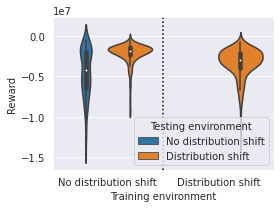

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
sns.violinplot(data=df, x='Training environment', y='reward', hue='Testing environment', ax=ax,
               hue_order=['No distribution shift', 'Distribution shift'])
ax.set(xlabel='Training environment', ylabel='Reward')
ax.axvline(0.5, linestyle=':', color='black')
fig.savefig('examples/cogen/violinplot.png', bbox_inches='tight', dpi=300)